# tf.keras - 모형의 훈련과 훈련된 모형의 저장/복원

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

print(' TensorFlow version:', tf.__version__)
print(' tf.keras version:', tf.keras.__version__)

 TensorFlow version: 2.7.0
 tf.keras version: 2.7.0


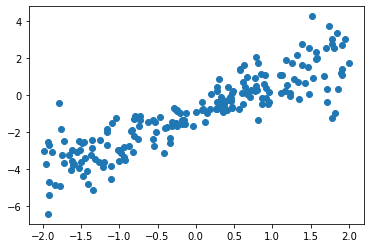

In [2]:
## 랜덤한 회귀용 예제 데이터셋을 만듭니다

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

In [3]:
# 훈련데이터 / 테스트 데이터 나누기
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

x_train = x_train.reshape(x_train.size,1)
x_test = x_test.reshape(x_test.size, 1)

### 모형의 생성

In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 모형의 훈련

세 가지 유형의 모형은 모두 간단한 compile 및 fit 명령어를 사용하여 컴파일 및 훈련 가능하다. 

**compile()메서드** 


* `loss = 'mse'` 에서 회귀문제를 위해 평균제곱오차를 손실함수로 설정한다.
* 다중 클래스 분류 문제를 위해서는 `categorical_crossentropy`, 이진 분류에서는 `binary_crossentropy`를 사용한다.
* `optimizer='sgd'` 경사하강법 옵티마이저를 정한다. SGD 이외에도 여러가지가 있다.

참고) https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

In [6]:
model.compile(optimizer='sgd', loss='mse')

**fit()메서드**

* `validation_split=0.3` : 검증데이터 크기를  30%로 한다.
* `history` : 히스토리 객체는 epoch마다 계산한 손실 함수 값이 저장되어 있다. 
* 훈련세트에 대한 손실 함수값은 `'loss'` 키에 담겨 있다.

참고) https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [7]:
history = model.fit(x_train, y_train, epochs=100, 
                    validation_split=0.3)

Epoch 1/100
4/4 [==============================] - 0s 31ms/step - loss: 14.3083 - val_loss: 8.7534
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 11.7670 - val_loss: 7.1957
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 9.5618 - val_loss: 6.0078
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 7.8370 - val_loss: 5.0493
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 6.4672 - val_loss: 4.2971
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 5.3736 - val_loss: 3.5950
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 4.3713 - val_loss: 3.0807
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 3.6580 - val_loss: 2.6744
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 3.0960 - val_loss: 2.3421
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6203 - val_loss: 2.0811
Epoch 11/100
4/4 [========

4/4 [==============================] - 0s 6ms/step - loss: 0.7576 - val_loss: 0.8964
Epoch 85/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7565 - val_loss: 0.8938
Epoch 86/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7564 - val_loss: 0.8954
Epoch 87/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7561 - val_loss: 0.8961
Epoch 88/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7567 - val_loss: 0.8996
Epoch 89/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7569 - val_loss: 0.8991
Epoch 90/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7577 - val_loss: 0.8960
Epoch 91/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7571 - val_loss: 0.8957
Epoch 92/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7572 - val_loss: 0.8945
Epoch 93/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7571 - val_loss: 0.8935
Epoch 94/100
4/4 [===============

### 훈련 결과 확인

fit 메소드를 수행한 결과로 history 객체에는 각 epoch 마다 계산된 손실 함수 값이 저장되어 있다. 이를 시각화하여 훈련 결과를 확인할 수 있다.

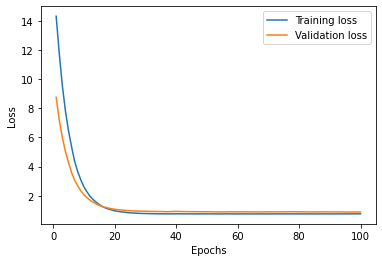

In [8]:
epochs = np.arange(1, 100+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss') # validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### tf.keras 모델의 저장과 복원

In [9]:
model.save_weights('simple_weights.h5')

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

model.load_weights('simple_weights.h5')

In [11]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.9550


0.9549922347068787

In [12]:
model.save('simple_model.h5')

In [13]:
model = tf.keras.models.load_model('simple_model.h5')
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.9550


0.9549922347068787

### 회귀 직선식을 시각화하여 출력한다.

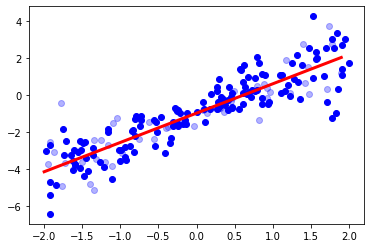

In [14]:
# 짙은 색은 훈련데이터, 밝은 색은 테스트 데이터
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()